<a href="https://colab.research.google.com/github/NimaZah/Ok-Cupid/blob/main/Ok_Cupid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cupid_data = pd.read_csv('Ok_Cupid_Datset.csv')

cupid_data.head()


In [21]:
cupid_data = cupid_data.assign(edu=cupid_data.education.str.split(' ', expand=True)[0])
cupid_data = cupid_data.assign(c2=cupid_data.education.str.split(' ', expand=True)[1])
cupid_data = cupid_data.assign(sign=cupid_data.sign.str.split(' ', expand=True)[0])

cupid_data = cupid_data.assign(city=cupid_data.location.str.split(', ', expand=True)[0])
cupid_data = cupid_data.assign(c2=cupid_data.location.str.split(', ', expand=True)[1])

In [22]:
cupid_data = cupid_data[['age', 'status', 'sex', 'orientation', 'body_type', 'drinks', 'drugs', 'ethnicity', 'city', 'sign', 'smokes', 'edu']]

cupid_data.head()

,age,status,sex,orientation,body_type,drinks,drugs,ethnicity,city,sign,smokes,edu
0,22,single,m,straight,a little extra,socially,never,"asian, white",south san francisco,gemini,sometimes,working
1,35,single,m,straight,average,often,sometimes,white,oakland,cancer,no,working
2,38,available,m,straight,thin,socially,NaN,NaN,san francisco,pisces,no,graduated
3,23,single,m,straight,thin,socially,NaN,white,berkeley,pisces,no,working
4,29,single,m,straight,athletic,socially,never,"asian, black, other",san francisco,aquarius,no,graduated


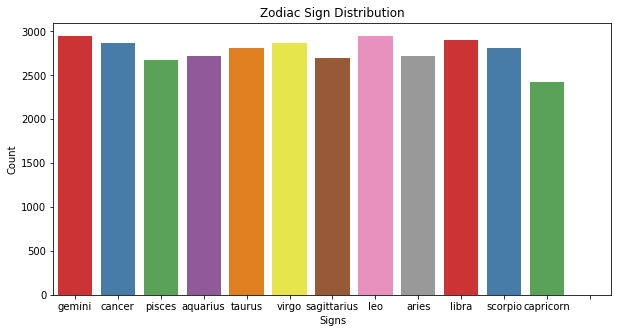

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='sign', data=cupid_data, palette='Set1')
plt.xlabel('Signs')
plt.ylabel('Count')
plt.title('Zodiac Sign Distribution')
plt.show()

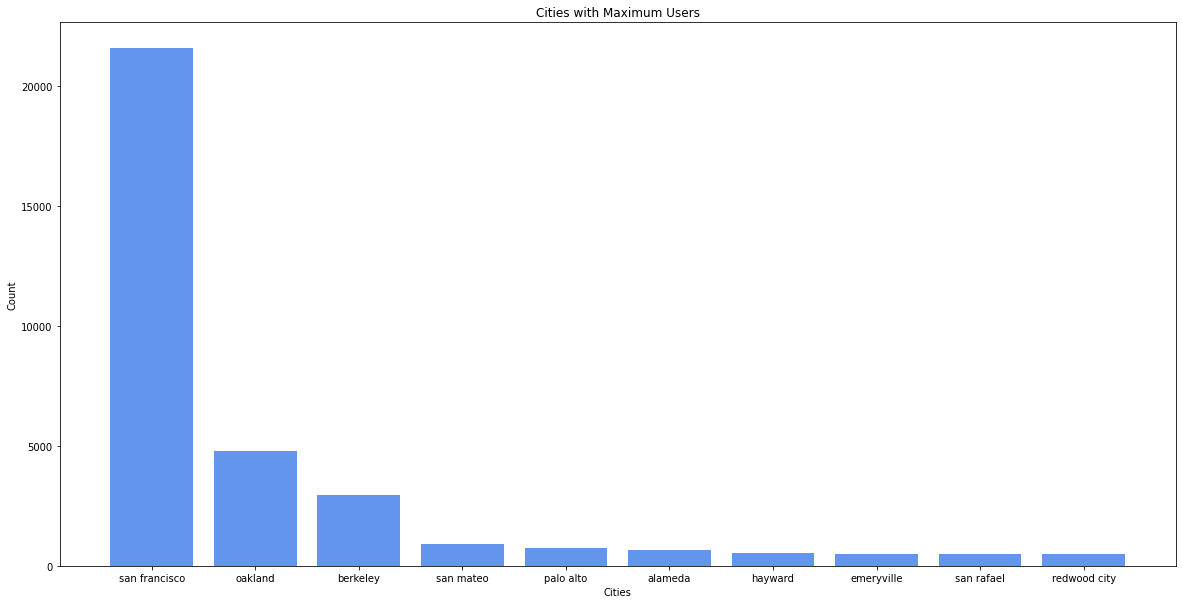

In [42]:
city_dat = cupid_data[~cupid_data.city.isna()].groupby('city').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.bar(city_dat.index, city_dat.values, color="#6495ED")
plt.xlabel("Cities")
plt.ylabel("Count")
plt.title("Cities with Maximum Users")
plt.show()

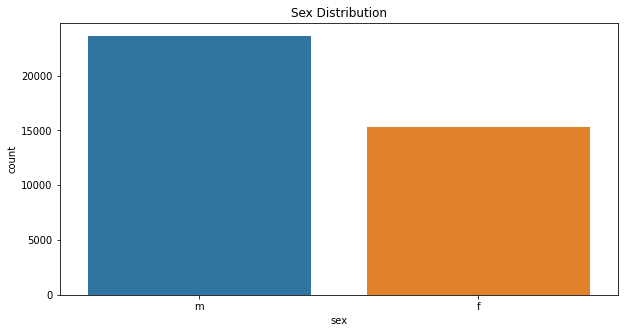

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

Text(0.5, 1.0, 'Status Ratio v/s Age on OkCupid')

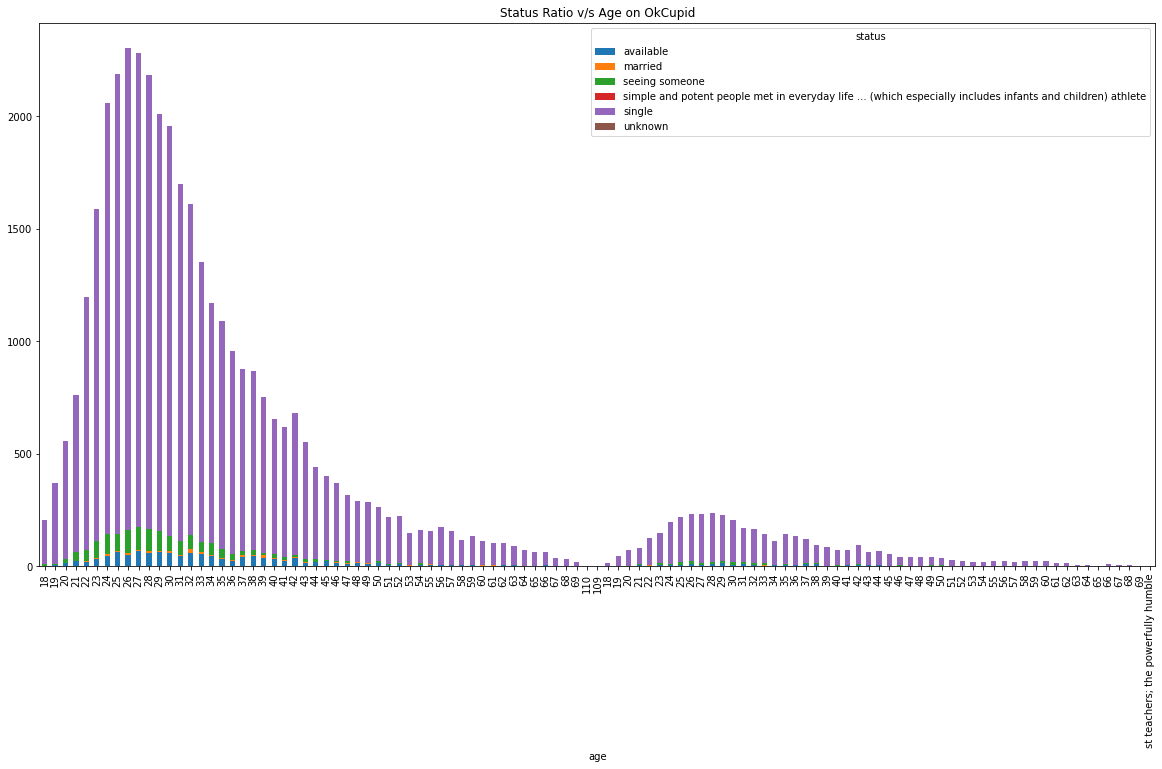

In [47]:
cupid_data.groupby(['age', 'status']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Status Ratio v/s Age on OkCupid")

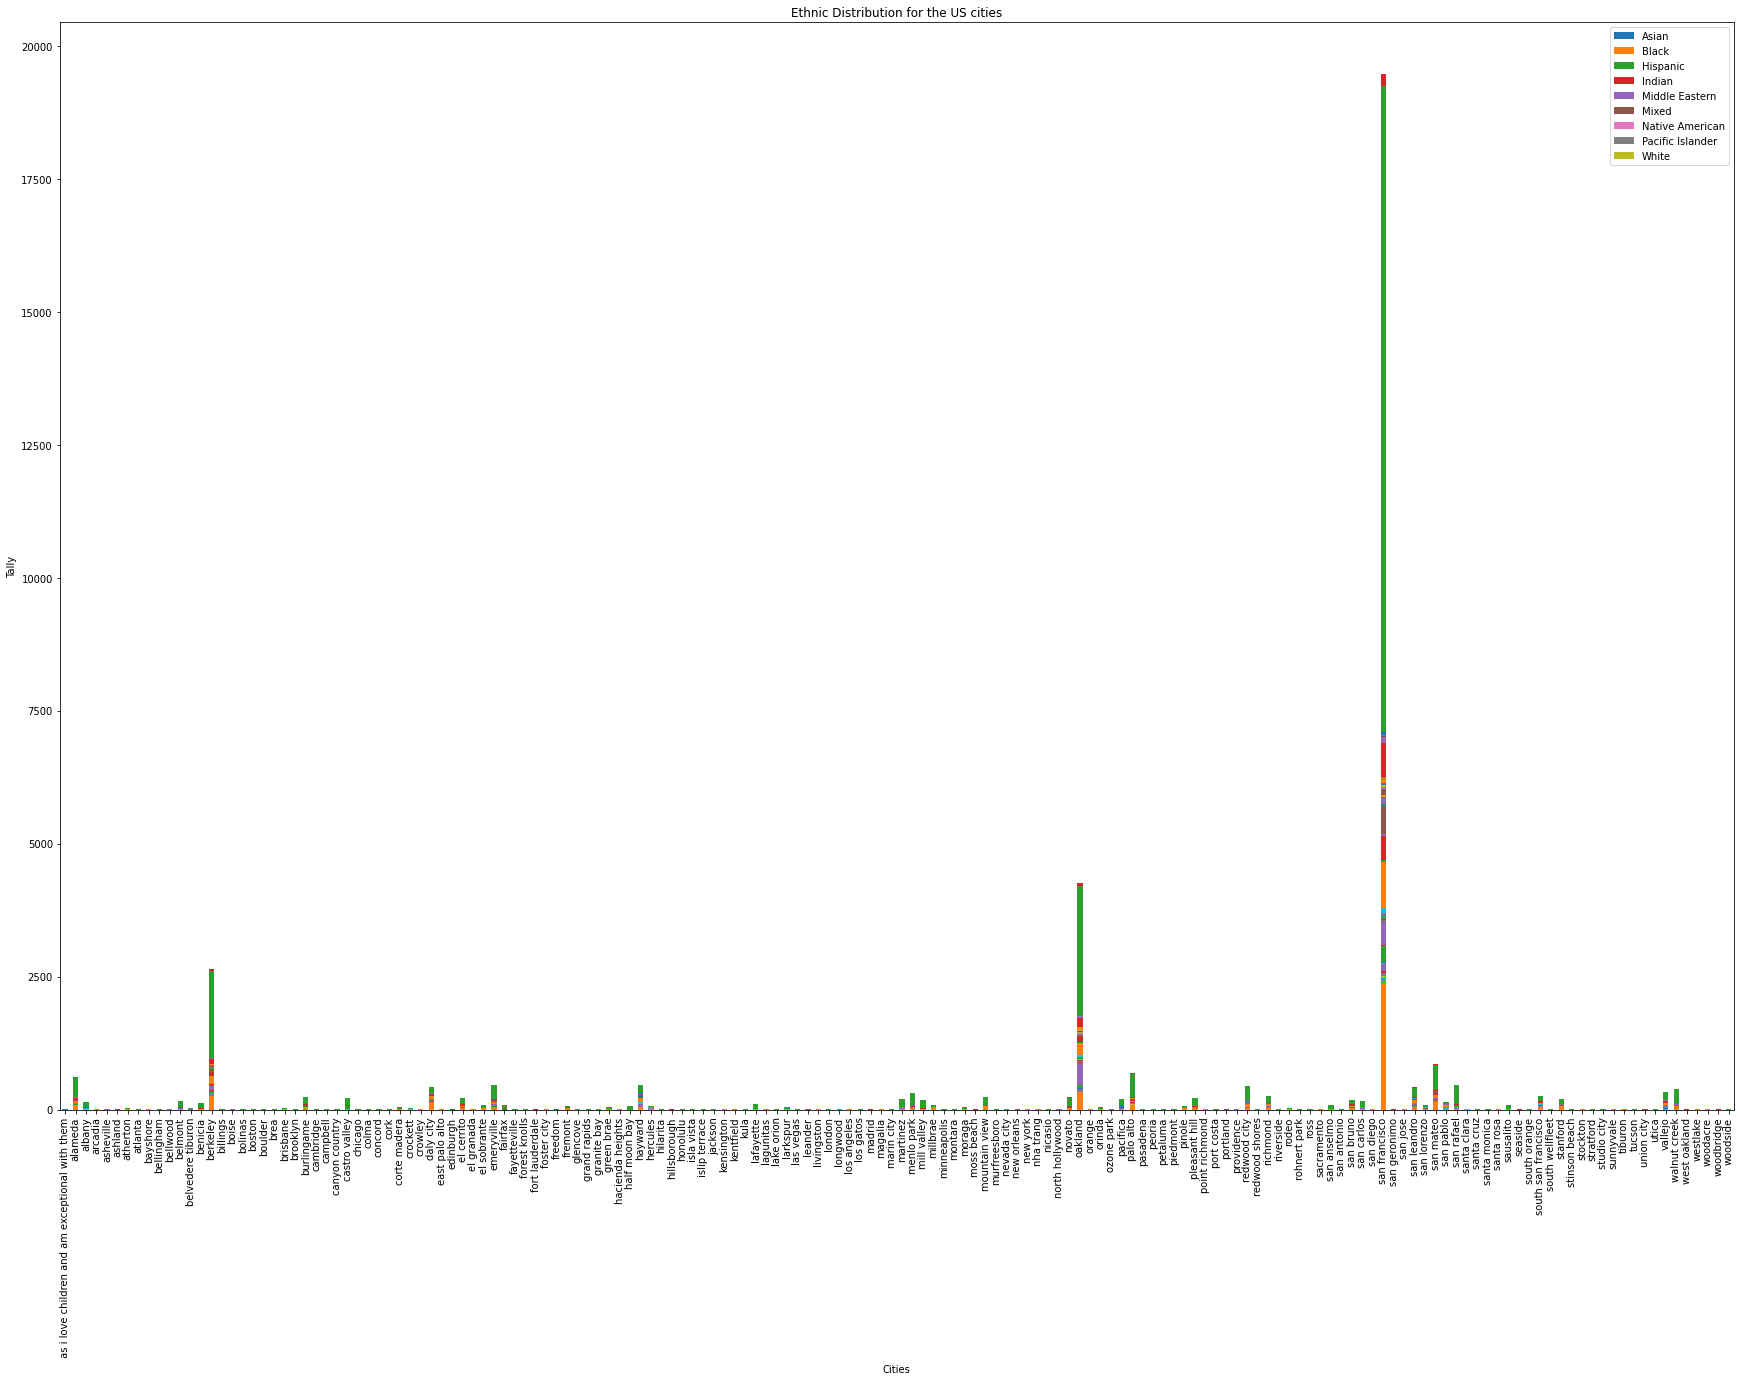

In [52]:
cupid_data.groupby(['city', 'ethnicity']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,20))
plt.title("Ethnic Distribution for the US cities")
plt.xlabel("Cities")
plt.ylabel("Tally")
plt.legend(['Asian', 'Black', 'Hispanic', 'Indian', 'Middle Eastern', 'Mixed', 'Native American', 'Pacific Islander', 'White'])
plt.show()

In [ ]:
# there are some empty values in the column age. We need to remove them.
df['age'].replace('', np.nan, inplace=True)
df.dropna(subset=['age'], inplace=True)
df.shape

(38879, 154)

In [ ]:
# ```TypeError: Neither the `x` nor `y` variable appears to be numeric.``` This error means that the data type of the column age is not numeric. We need to convert it to numeric.
df['age'] = pd.to_numeric(df['age'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


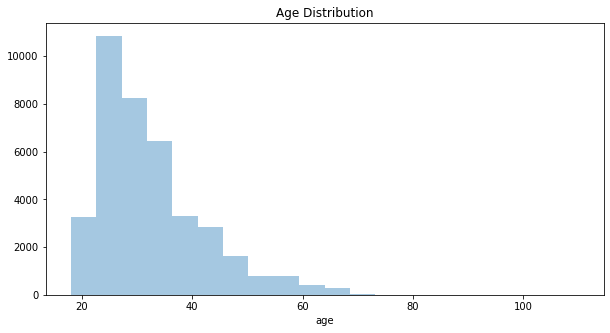

In [ ]:
# 
plt.figure(figsize=(10,5))
sns.distplot(df['age'], kde=False, bins=20)
plt.title('Age Distribution')
plt.show()


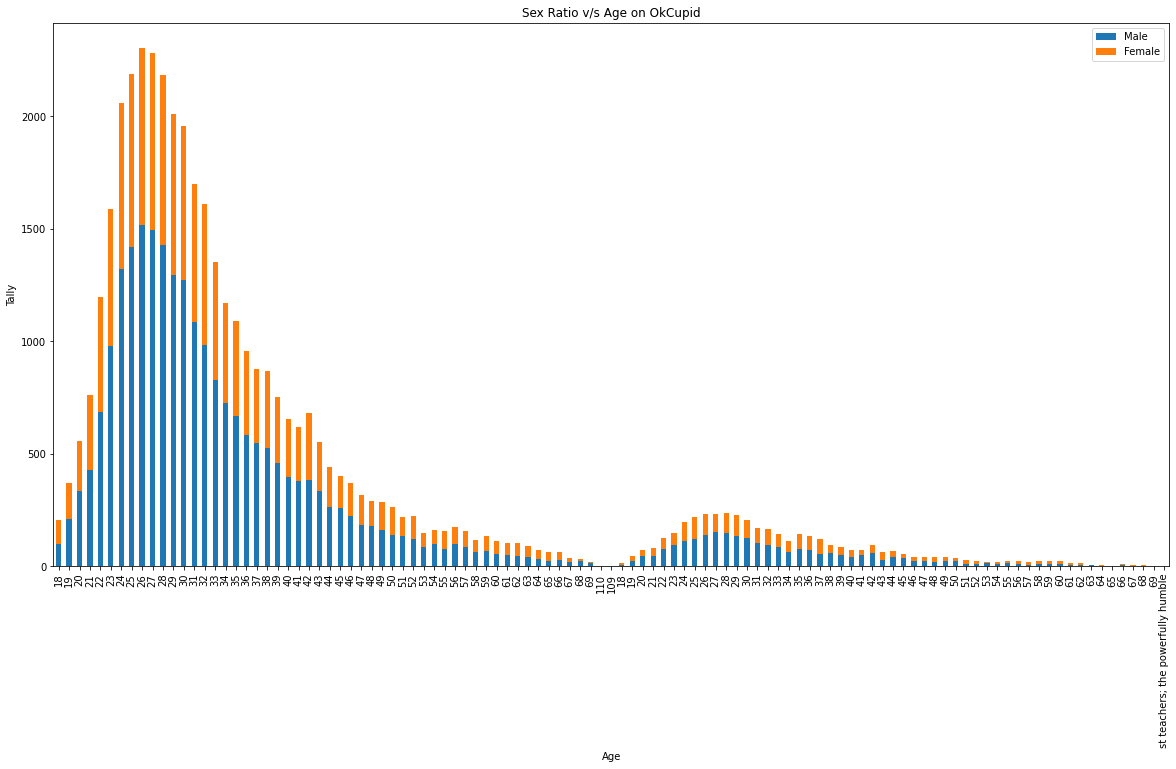

In [41]:
cupid_data.groupby(['age', 'sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Sex Ratio v/s Age on OkCupid")
plt.xlabel("Age")
plt.ylabel("Tally")
plt.legend(['Male', 'Female'])
plt.show()

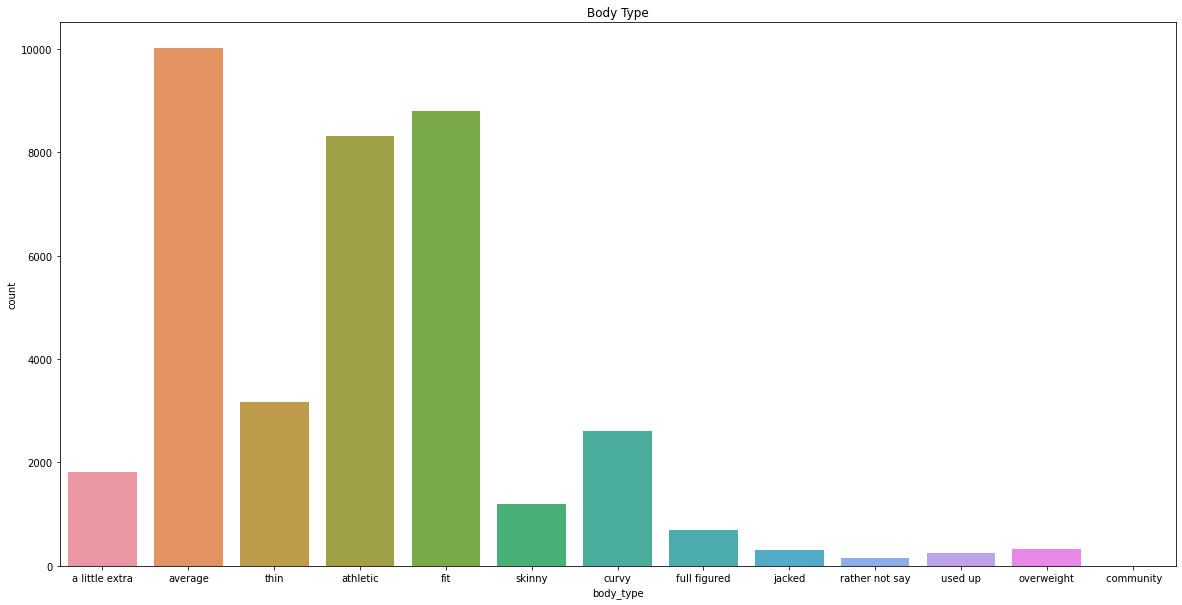

In [43]:
# Body Type
plt.figure(figsize=(20,10))
sns.countplot(x='body_type', data=df)
plt.title('Body Type')
plt.show()

In [ ]:
# Pivot table for body type, grouped by sex
df.groupby(['body_type', 'sex'])['sex'].count()

body_type       sex
a little extra  f       520
                m      1117
athletic        f      1475
                m      6512
average         f      3636
                m      5919
curvy           f      2401
                m        71
fit             f      2875
                m      5508
full figured    f       556
                m        86
jacked          f        79
                m       184
overweight      f        96
                m       182
skinny          f       363
                m       744
thin            f      1545
                m      1458
used up         f        58
                m       127
Name: sex, dtype: int64

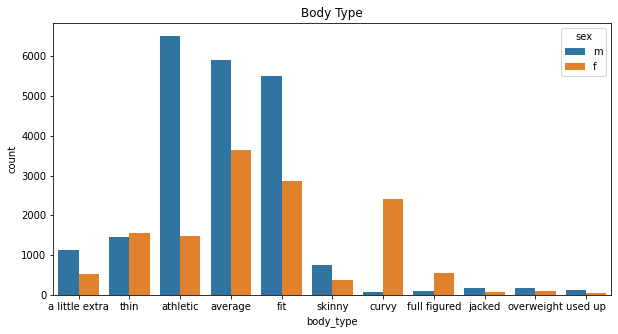

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='body_type', hue='sex', data=df)
plt.title('Body Type')
plt.show()

In [ ]:
df['education'].value_counts()

graduated from college/university              16432
graduated from masters program                  6216
working on college/university                   3867
working on masters program                      1142
graduated from two-year college                 1030
graduated from high school                       947
graduated from ph.d program                      860
graduated from law school                        785
working on two-year college                      730
dropped out of college/university                691
working on ph.d program                          672
college/university                               531
graduated from space camp                        460
dropped out of space camp                        365
graduated from med school                        326
working on space camp                            311
working on law school                            192
two-year college                                 163
dropped out of two-year college               

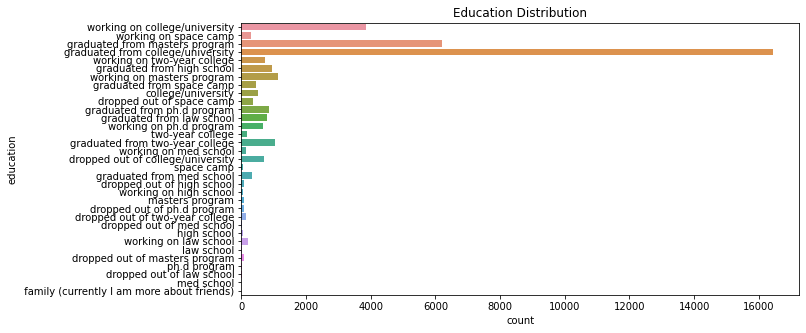

In [ ]:
# Since the x-axis has too many categories, we reorient and plot the data in a horizontal bar plot:
plt.figure(figsize=(10,5))
sns.countplot(y='education', data=df)
plt.title('Education Distribution')
plt.show()

In [ ]:
# We drop some of the items in education column: family (currently i'm more about friends, med school, dropped out of med school, dropped out of law school, space camp, dropped out of high school,dropped out of ph.d program, dropped out of masters program, dropped out of two-year college.
df = df[df.education != 'family']
df = df[df.education != 'med school']
df = df[df.education != 'dropped out of med school']
df = df[df.education != 'dropped out of law school']
df = df[df.education != 'space camp']
df = df[df.education != 'dropped out of high school']
df = df[df.education != 'dropped out of ph.d program']
df = df[df.education != 'dropped out of masters program']
df = df[df.education != 'dropped out of two-year college']
df = df[df.education != 'dropped out of college/university']
df = df[df.education != 'graduated from space camp']
df = df[df.education != 'dropped out of space camp']
df = df[df.education != 'working on space camp']
df = df[df.education != ' family (currently I am more about friends)']

df['education'].value_counts()

graduated from college/university    16432
graduated from masters program        6216
working on college/university         3867
working on masters program            1142
graduated from two-year college       1030
graduated from high school             947
graduated from ph.d program            860
graduated from law school              785
working on two-year college            730
working on ph.d program                672
college/university                     531
graduated from med school              326
working on law school                  192
two-year college                       163
working on med school                  148
masters program                         96
high school                             61
working on high school                  55
ph.d program                            16
law school                              12
Name: education, dtype: int64

In [ ]:
# Creating 4 categories in education: highschool, undergraduate, masters, phd
df['education'] = df['education'].replace(['graduated from high school', 'working on high school'], 'highschool')
df['education'] = df['education'].replace(['graduated from two-year college', 'working on two-year college', 'graduated from college/university', 'graduated from law school', 'college/university', 'working on law school', 'working on med school', 'law school', 'working on college/university', 'graduated from med school', 'two-year college', 'high school'], 'undergraduate')
df['education'] = df['education'].replace(['graduated from masters program', 'working on masters program', 'masters program'], 'masters')
df['education'] = df['education'].replace(['graduated from ph.d program', 'working on ph.d program', 'ph.d program'], 'phd')
df['education'].value_counts()

undergraduate    24277
masters           7454
phd               1548
highschool        1002
Name: education, dtype: int64

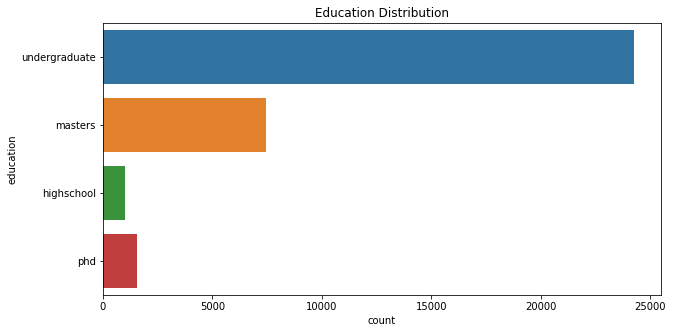

In [ ]:
# We creat only three categories for education: drop out, high school and graduate.
plt.figure(figsize=(10,5))
sns.countplot(y='education', data=df)
plt.title('Education Distribution')
plt.show()

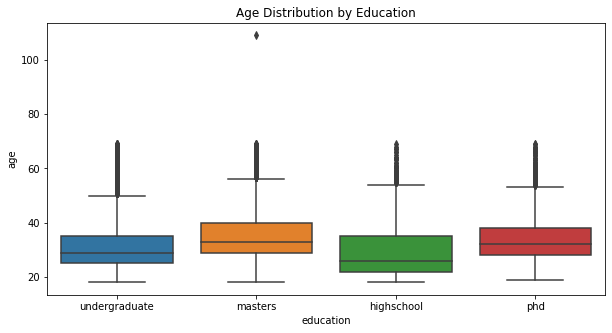

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='education', y='age', data=df)
plt.title('Age Distribution by Education')
plt.show()